In [87]:
%run -i ./../common/common
%run -i ./../source_sink_freestream/freestream
%run -i ./doublet
%matplotlib inline

In [88]:
N = 50
rect = Rect(-2.0, 2.0, -1.0, 1.0)
grid = rect.make_grid(N)

In [89]:
doublet = Doublet(0.0, 0.0, 1.0)

In [90]:
size = 10

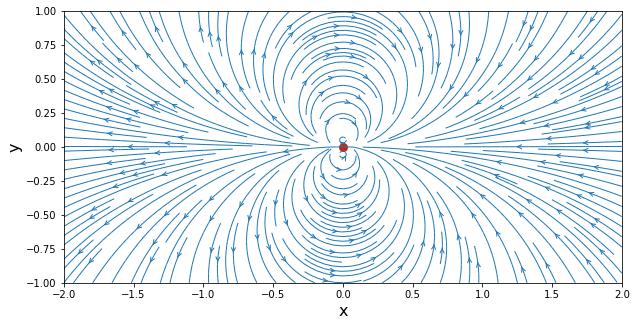

In [91]:
vel_doublet = doublet.velocity(grid)

setup_fig(rect, size)
streamplot_with(*grid, *vel_doublet, override={'arrowsize': 1})
plt.scatter(*doublet.coords, **scatter_params)

In [93]:
stream = Freestream(1.0)

vel = sum_pair(vel_doublet, stream.velocity(grid))
pot = doublet.potential(grid) + stream.potential(grid)

In [94]:
def stagnation_points(doublet, stream):
    x = math.sqrt(doublet.strength/(2.0 * math.pi * stream.vel_inf))
    return (Coords(+x, 0), Coords(-x, 0))

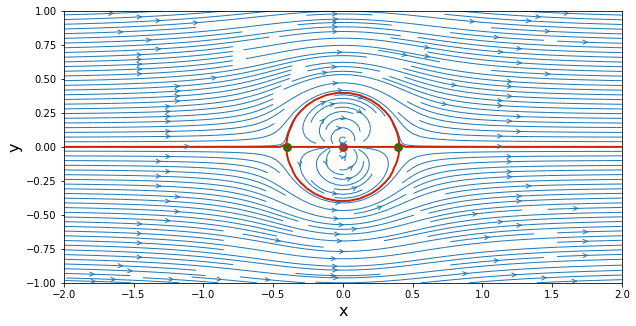

In [95]:
stags = stagnation_points(doublet, stream)

setup_fig(rect, size)
streamplot_with(*grid, *vel, override={'arrowsize': 1})
plt.contour(*grid, pot, levels=[0.0], colors='#CD2305', linewidths=2, linestyles='solid')
plt.scatter(*doublet.coords, **scatter_params)
scatter_with(*unzip_coords(*stags), override={'color': 'g'})

In [96]:
def pressure_field(vel_grid, vel_inf):
    u, v = vel_grid
    return -(u**2 + v**2)/vel_inf**2 + 1.0

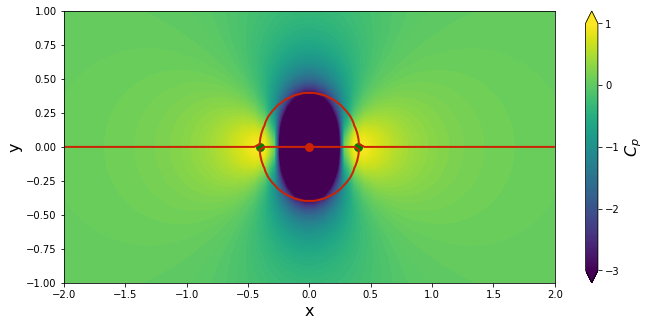

In [113]:
cp = pressure_field(vel, stream.vel_inf)

plt.figure(figsize=(1.1*size, rect.height/rect.width*size))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(*rect.span_x)
plt.ylim(*rect.span_y)

contf = plt.contourf(*grid, cp, levels=np.linspace(-3.0, 1.0, 100), extend='both')
cbar = plt.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-3.0, -2.0, -1.0, 0.0, 1.0])

plt.contour(*grid, pot, levels=[0.0], colors='#CD2305', linewidths=2, linestyles='solid')
plt.scatter(*doublet.coords, **scatter_params)
scatter_with(*unzip_coords(*stags), override={'color': 'g'})

In [111]:
def plot_pressure_angle(size: float, xpoints: int):
    rect = Rect(0, math.pi, -3.5, 1.5)
    xs = np.linspace(*rect.span_x, xpoints)
    ys = - np.sin(xs)**2 * 4.0 + 1.0
    plt.xlabel('θ')
    plt.ylabel('$C_p (θ)$')
    plt.xlim(rect.span_x)
    plt.ylim(rect.span_y)
    plt.plot(xs, ys)
    plt.show

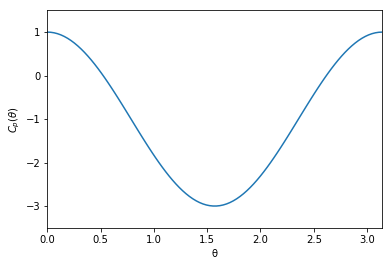

In [112]:
plot_pressure_angle(10, 100)